<a href="https://colab.research.google.com/github/gabrielhabibi/Assignment_Student_Score/blob/main/Salinan_dari_Assignment_template_DSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

In [ ]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('/content/student_scores.xlsx')
data.head()

,Hours (x),Scores (y)
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


###Exploratory Data Analysis

In [ ]:
# Provides some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hours (x)   25 non-null     float64
 1   Scores (y)  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [ ]:
# this describes the basic stat behind the dataset used
data.describe()

,Hours (x),Scores (y)
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

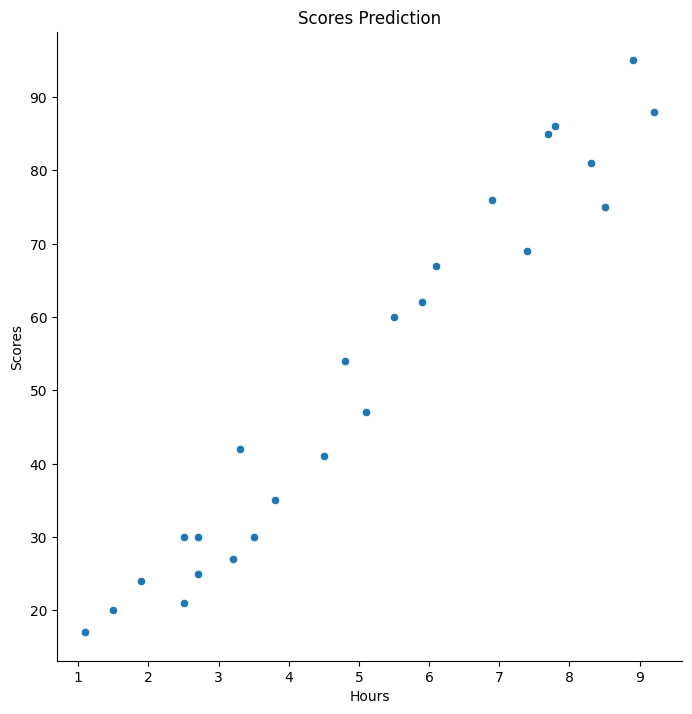

In [ ]:
# These Plots help to explain the values and how they are scattered

plt.figure(figsize=(12,6))
sns.pairplot(data, x_vars=['Hours (x)'], y_vars=['Scores (y)'], size=7, kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores Prediction')
plt.show()

**Penjelasan:**
Scores Prediction di atas menunjukkan hubungan antara jam belajar (Hours) dan nilai ujian (Scores).
Sumbu X (Hours): Jumlah jam belajar siswa.
Sumbu Y (Scores): Nilai ujian yang diperoleh.
Pola Data:
Semakin banyak jam belajar, nilai cenderung meningkat (korelasi positif).
Ada sedikit anomali, misalnya siswa dengan 7 jam belajar mendapat skor lebih tinggi dari yang belajar 8 jam.
Kesimpulan:
Hubungan ini tidak selalu linear sempurna karena faktor individu dan eksternal.
Model regresi linear bisa digunakan untuk melihat tren lebih jelas.

### Feature Engineering
1. Check Duplicated Data
2. Check Missing Value Handling
3. Outlier Analysis
4. Encoding categorical : change string (categorical) into numerical -> in this dataset, there are no categorical data.

### Investigate of Feature Engineering

In [ ]:
df = data.copy()

In [ ]:
#Check Duplicated Data
print("Data Sebelum Pemeriksaan Duplikat:")
print(df.shape)

Data Sebelum Pemeriksaan Duplikat:
(25, 2)


In [ ]:
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before

,Hours (x),Scores (y)


In [ ]:
df = df.drop_duplicates()

In [ ]:
print("\nData Setelah Pemeriksaan Duplikat:")
print(df.shape)


Data Setelah Pemeriksaan Duplikat:
(25, 2)


In [ ]:
#Check missing value
df.isna().sum()

,0
Hours (x),0
Scores (y),0


### There is no missing value

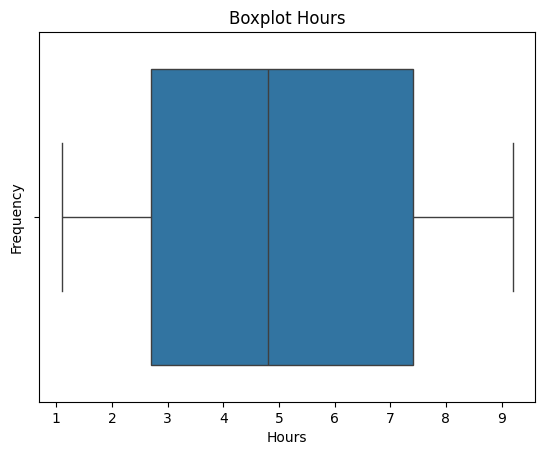

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Analysis
sns.boxplot(x="Hours (x)", data=df)

# Menambahkan label sumbu dan judul
plt.xlabel("Hours")
plt.ylabel("Frequency")  # Anda bisa menggunakan "Years of Experience" atau "Tahun Pengalaman"
plt.title("Boxplot Hours")

# Menampilkan plot
plt.show()

### There's no outlier value
### There are no problems in investigate Feature Engineering, next we are doing machine learning modelling and splitting data into X_train, X_test -> Predictor, y_train, y_test -> target variables. If there are problems in investigate feature engineering then doing splitting data and process feature engineering handling.

### Splitting the data

In [ ]:
# Experience of Years data
X = df['Hours (x)']
X.head()

,Hours (x)
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [ ]:
# Salary data
y = df['Scores (y)']
y.head()

,Scores (y)
0,21
1,47
2,27
3,75
4,30


In [ ]:
# Import machine learning data from scikit learn
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data for train and test
# train : test = 75 : 25 atau 80 : 20 atau 70:30 atau 85:15 , size train > test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)
# X_train dan y_train -> knowledge dari dosen ke mahasiswa (X_train contoh soal), y_train (kunci jawaban dari contoh soal)
# X_test dan y_test -> soal2 ujian (UTS maupun UAS) (X_test), y_test (kunci jawaban dosennya / data aktual)

In [ ]:
X_train

,Hours (x)
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5
20,2.7
17,1.9


In [ ]:
X_test

,Hours (x)
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9
9,2.7
13,3.3


**Linear Regression**

In [ ]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [ ]:
# Create new axis for x column in array
import numpy as np
# Convert X_train and X_test to NumPy arrays
X_train = X_train.to_numpy() # Kolom x nya ada 1 saja, jika lebih dari 1 untuk x nya maka tidak code to_numpy() dibiarkan dalam bentuk dataframe
X_test = X_test.to_numpy()

# Add new axis to the end
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [ ]:
#array
X_train

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [ ]:
#array
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [ ]:
y_train

,Scores (y)
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30
20,30
17,24


In [ ]:
y_test

,Scores (y)
8,81
16,30
0,21
23,76
11,62
9,25
13,42


In [ ]:
# Fitting the model using Linear Regression
lr_model = LinearRegression() # Mahasiswa A
lr_model.fit(X_train,y_train) # Belajar

LinearRegression()

In [ ]:
y_pred_train = lr_model.predict(X_train)
y_pred_train

array([52.02223727, 39.39391742, 17.05150538, 33.56546211, 46.19378196,
       88.93578761, 85.05015073, 36.47968977, 28.70841601, 20.93714226,
       49.10800962, 61.73632947, 78.25028619, 55.90787415, 77.27887697,
       13.1658685 , 74.36464932, 91.85001526])

In [ ]:
y_train

,Scores (y)
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30
20,30
17,24


In [ ]:
# Predicting the Salary for the Test values
y_pred = lr_model.predict(X_test) # UTS ataupun UAS
# y_pred -> jawaban mahasiswa linear regression

In [ ]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [ ]:
y_pred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

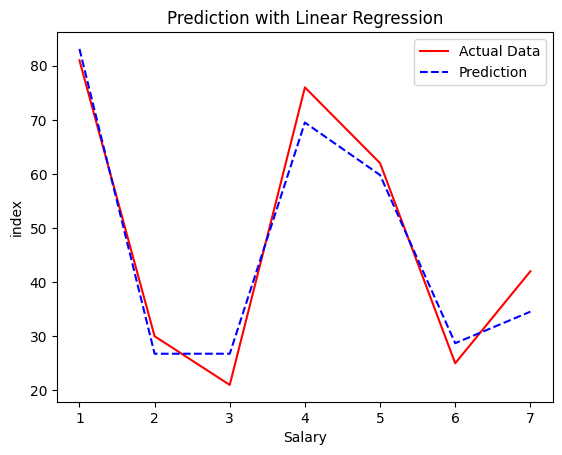

In [ ]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

Keterangan:
Prediction with Linear Regression → Grafik ini membandingkan data aktual dan prediksi menggunakan regresi linear.
Sumbu X (Salary):

Mewakili variabel independen (Salary), yaitu gaji atau nilai yang diprediksi.
Sumbu Y (Index):

Menunjukkan indeks atau nilai aktual dari data.
Garis dalam Grafik:

Garis merah (Actual Data) → Data asli yang diamati.
Garis biru putus-putus (Prediction) → Hasil prediksi dari model regresi linear.
Analisis:

Model regresi linear cukup mengikuti pola data aktual, tetapi ada beberapa perbedaan, terutama di titik-titik ekstrem (misalnya di puncak dan lembah).
Ini menunjukkan bahwa regresi linear dapat memperkirakan tren, tetapi mungkin tidak menangkap fluktuasi yang sangat tajam.
Kesimpulan:

Model cukup baik dalam menangkap pola data, meskipun masih ada selisih antara prediksi dan data aktual.

In [ ]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
# Calculate R square vale
rsq = r2_score(y_test,y_pred)

In [ ]:
print('r square Linear Regression:',rsq)

r square Linear Regression: 0.9553509219739938


In [ ]:
# Intecept and coeff of the line
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)

Intercept of the Linear Regression model: 2.4803670915057623
Coefficient of the line Linear Regression: [9.71409219]


![](http://)Then it is said to form a line with result in Linear Regression
# y = 2.48036 + 9.71409 x
with x is the value of year experience work

In [ ]:
# y_test = 81
# x_test = 8.3
# y = 2.48036 + 9.71409 * 8.3

nilai_y = 2.48036 + 9.71409 * 8.3
print('nilai y : ', nilai_y )

nilai y :  83.10730700000002


**Decision Tree Regressor**
Using another Machine Learning Model :
1. Decision Tree
2. Random Forest

In [ ]:
from sklearn.tree import DecisionTreeRegressor # mahasiswa B

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Predicting the Salary for the Test values
y_pred_dt = dt_model.predict(X_test) # soal uts maupun uas

In [ ]:
y_pred_dt

array([75., 30., 30., 69., 67., 30., 27.])

In [ ]:
y_test

,Scores (y)
8,81
16,30
0,21
23,76
11,62
9,25
13,42


In [ ]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

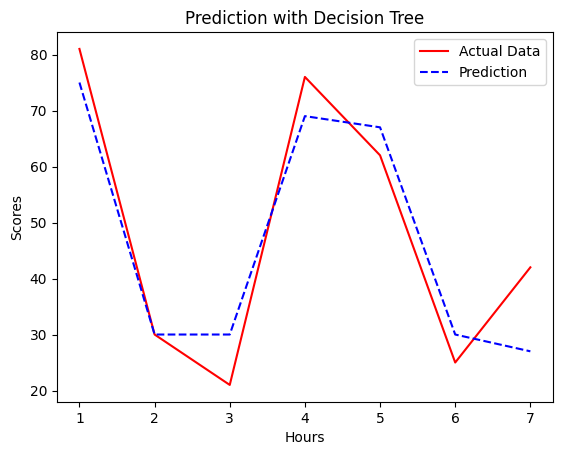

In [ ]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

Keterangan:
Prediction with Decision Tree → Grafik ini membandingkan data aktual dan prediksi menggunakan algoritma Decision Tree.
Sumbu X (Hours):

Mewakili jumlah jam belajar siswa (Hours).
Sumbu Y (Scores):

Menunjukkan skor ujian yang diperoleh siswa (Scores).
Garis dalam Grafik:

Garis merah (Actual Data) → Data asli yang diamati.
Garis biru putus-putus (Prediction) → Hasil prediksi menggunakan model Decision Tree.
Analisis:

Model Decision Tree cenderung mengikuti pola data asli dengan lebih fleksibel dibanding regresi linear.
Terlihat adanya perubahan tajam pada garis prediksi, menunjukkan bahwa model menangkap pola secara lebih spesifik.
Namun, model ini bisa mengalami overfitting, terutama jika terlalu banyak cabang dalam pohon keputusan.
Kesimpulan:

Decision Tree mampu menangkap fluktuasi data lebih baik dibanding regresi linear, tetapi berpotensi terlalu menyesuaikan dengan data latih.

In [ ]:
# Calculate R square vale
rsq_dt = r2_score(y_test,y_pred_dt)

In [ ]:
print('r square Decision Tree Results:',rsq_dt)

r square Decision Tree Results: 0.8803859268443893
